## Metrics
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [ ]:
import numpy as np

# True
a = np.array([1,0,0,1,0,1,1])
# Predict
b = np.array([0,0,0,1,1,1,0])

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

acc = accuracy_score(a, b)
print("The accuracy is {:.2f}\n".format(acc))

recall = recall_score(a, b)
print("The recall is {:.2f}\n".format(recall))

precision = precision_score(a, b)
print("The precision is {:.2f}\n".format(precision))

f1 = f1_score(a, b)
print("The f1 score is {:.2f}\n".format(f1))

print("The confusion matrix:")
print(confusion_matrix(a, b))

print("\nThe classification report is:")
print(classification_report(a, b))

The accuracy is 0.57

The recall is 0.50

The precision is 0.67

The f1 score is 0.57

The confusion matrix:
[[2 1]
 [2 2]]

The classification report is:
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.67      0.50      0.57         4

    accuracy                           0.57         7
   macro avg       0.58      0.58      0.57         7
weighted avg       0.60      0.57      0.57         7



In [ ]:
import numpy as np

a = np.array([1,1,0,0,0,0,0,0])
b = np.array([0,1,0,0,0,0,0,0])

# Imbalance 한 상황과 관련해서 이야기 해보기

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

acc = accuracy_score(a, b)
print("The accuracy is {:.2f}\n".format(acc))

recall = recall_score(a, b)
print("The recall is {:.2f}\n".format(recall))

precision = precision_score(a, b)
print("The precision is {:.2f}\n".format(precision))

f1_score = f1_score(a, b)
print("The f1 is {:.2f}\n".format(f1_score))

print("The confusion matrix:")
print(confusion_matrix(a, b))

print("\nThe classification report is:")
print(classification_report(a, b))

The accuracy is 0.88

The recall is 0.50

The precision is 1.00

The f1 is 0.67

The confusion matrix:
[[6 0]
 [1 1]]

The classification report is:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.50      0.67         2

    accuracy                           0.88         8
   macro avg       0.93      0.75      0.79         8
weighted avg       0.89      0.88      0.86         8



## Draw Pretty Confusion Matrix
* Matplotlib 패키지 사용

In [ ]:
# Load dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

iris = load_iris()

data = iris["data"] # 실제 데이터 (모델 인풋, X)
target = iris["target"] # 예측 값 (실제 아웃풋, Y)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=3) # 데이터 분할

clf = MultinomialNB() # 분류기 정의
clf.fit(X_train, y_train)

MultinomialNB()

### Use matplotlib

In [ ]:
! pip3 install matplotlib # install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


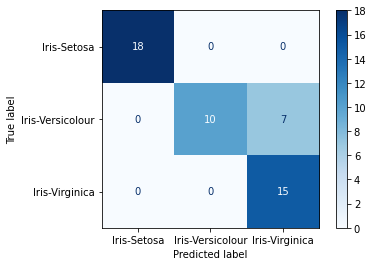

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

label = [
    "Iris-Setosa",
    "Iris-Versicolour",
    "Iris-Virginica",
]

plot = ConfusionMatrixDisplay.from_estimator(clf, # 분류 모델
                                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                                             display_labels=label, # 표에 표시할 labels
                                             cmap = 'Blues', # 컬러맵('Accent', 'Greys' 등이 있음. matplotlib.cm.cmap_d.keys()를 통해 종류 확인 가능)
                                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None 
plt.show()  

# Draw AUROC Curve
* 이진분류 데이터에 대해서만 AUROC커브를 그릴 수 있다.

In [ ]:
# Load dataset
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

cancer = load_breast_cancer() # 이진분류를 위한 데이터셋을 새로 로드

data = cancer["data"] # 실제 데이터 (모델 인풋, X)
target = cancer["target"] # 예측 값 (실제 아웃풋, Y)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=3) # 데이터 분할

clf = MultinomialNB() # 분류기 정의
clf.fit(X_train, y_train) # 분류기 훈련

# 모델의 예측값이 1(질병이 있을 확률)일 확률을 계산한다.
y_score = clf.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.metrics import roc_curve
fpr_model, tpr_model, _ = roc_curve(y_test, y_score) # 모델에 대한 roc_curve 계산 
# fpr = false positive rate
# tpr = true positive rate

ns_probs = [0 for _ in range(len(y_test))] # 기준선을 그리기 위해 모든 확률이 0인 데이터를 생성
fpr_none, tpr_none, _  = roc_curve(y_test, ns_probs) # 기준선에 대한 roc_curve 계산

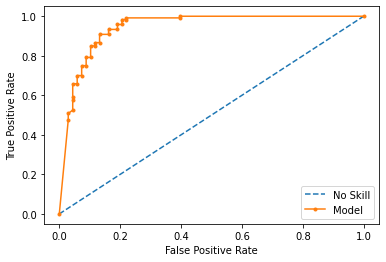

In [ ]:
plt.plot(fpr_none, tpr_none, linestyle='--', label='No Skill')
plt.plot(fpr_model, tpr_model, marker='.', label='Model')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# 실습 과제

1. 다음 데이터셋의 accuracy, confusion matrix, classification report를 출력하는 코드를 직접 작성해보세요.
2. Matplotlib을 사용해 다음 데이터셋의 Confusion Matrix를 그려보세요.

### Load Dataset - 수정 불필요

In [35]:
## Load dataset ##

from sklearn.datasets import load_wine
wine = load_wine() # 이진분류를 위한 데이터셋을 새로 로드

data = wine["data"] # 실제 데이터 (모델 인풋, X)
target = wine["target"] # 예측 값 (실제 아웃풋, Y)
feature_name = wine["feature_names"]

In [36]:
## Load dataset & Model Training##

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=3) # 데이터 분할

clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

### Report Result - 실습 문제

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

## Accuracy ##
acc = accuracy_score(y_test, y_pred)
print('accuracy : \n',acc)

## Confusion matrix ##
cm = confusion_matrix(y_test, y_pred)
print('The confusion matrix : \n',cm)

## Classification report ##
cr = classification_report(y_test, y_pred)
print('The classification report : \n',cr)

accuracy : 
 0.7966101694915254
The confusion matrix : 
 [[21  1  2]
 [ 2 17  4]
 [ 1  2  9]]
The classification report : 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        24
           1       0.85      0.74      0.79        23
           2       0.60      0.75      0.67        12

    accuracy                           0.80        59
   macro avg       0.78      0.79      0.78        59
weighted avg       0.81      0.80      0.80        59



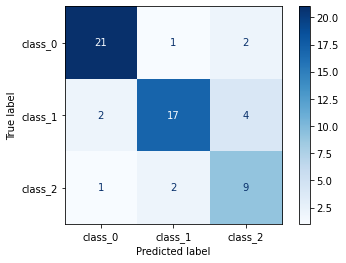

In [38]:
## Plotting Confusion Matrix ##
## label명 변경 필수 ##
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

label = list(wine.target_names)

plot = ConfusionMatrixDisplay.from_estimator(clf, 
                                             X_test, y_test, 
                                             display_labels=label, 
                                             cmap = 'Blues', 
                                             normalize=None) 
plt.show()  